Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=batch_size, 
    image_size=(img_width, img_height),
    shuffle=True, seed=123,
    validation_split = 0.2,
    subset = 'training',
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=batch_size, 
    image_size=(img_width, img_height),
    shuffle=True, seed=123,
    validation_split = 0.2,
    subset = 'validation',
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

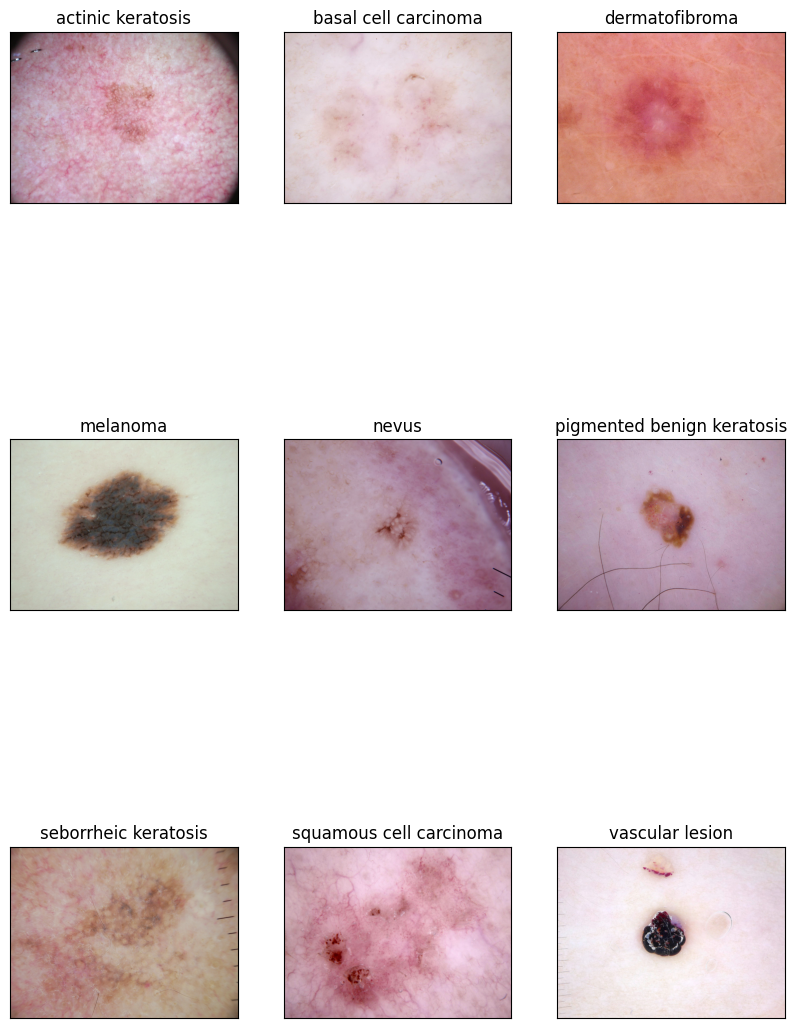

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,15))
for idx, image_class in enumerate(class_names):
    all_images_of_class = list(data_dir_train.joinpath(image_class).glob('*.jpg')) # List all the images for a particular class
    ax = fig.add_subplot(3, 3, 1 + idx, xticks=[], yticks=[])
    random_img_num = np.random.randint(len(all_images_of_class)) # Pick one random image of a class
    read_image = cv2.imread(str(all_images_of_class[random_img_num]))
    ax.set_title(image_class)
    plt.imshow(cv2.cvtColor(read_image, cv2.COLOR_BGR2RGB)) # Plot image in subplot

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(500).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [12]:
### Your code goes here
inputs = keras.Input(shape=(img_width, img_height, 3))

# Rescale images to [0, 1]
x = layers.Rescaling(scale=1.0 / 255)(inputs)


# Apply some convolution and pooling layers
x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
x = layers.Activation("relu")(x)

# Apply global average pooling to get flat feature vectors
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(32)(x)
x = layers.Dense(16)(x)

# Add a dense classifier on top
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0     

### Train the model

In [15]:

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 58s 106ms/step - loss: 1.7707 - accuracy: 0.3171 - val_loss: 2.6246 - val_accuracy: 0.1173
Epoch 2/20
169/169 [==============================] - 10s 61ms/step - loss: 1.5719 - accuracy: 0.3952 - val_loss: 2.4645 - val_accuracy: 0.1373
Epoch 3/20
169/169 [==============================] - 11s 66ms/step - loss: 1.5063 - accuracy: 0.4288 - val_loss: 1.5325 - val_accuracy: 0.3979
Epoch 4/20
169/169 [==============================] - 10s 61ms/step - loss: 1.4415 - accuracy: 0.4529 - val_loss: 2.0728 - val_accuracy: 0.3267
Epoch 5/20
169/169 [==============================] - 10s 62ms/step - loss: 1.4243 - accuracy: 0.4629 - val_loss: 2.3632 - val_accuracy: 0.2584
Epoch 6/20
169/169 [==============================] - 10s 62ms/step - loss: 1.4009 - accuracy: 0.4713 - val_loss: 1.8489 - val_accuracy: 0.3512
Epoch 7/20
169/169 [==============================] - 10s 62ms/step - loss: 1.3865 - accuracy: 0.4813 - val_loss: 1.5310 - val_accuracy

### Visualizing training results

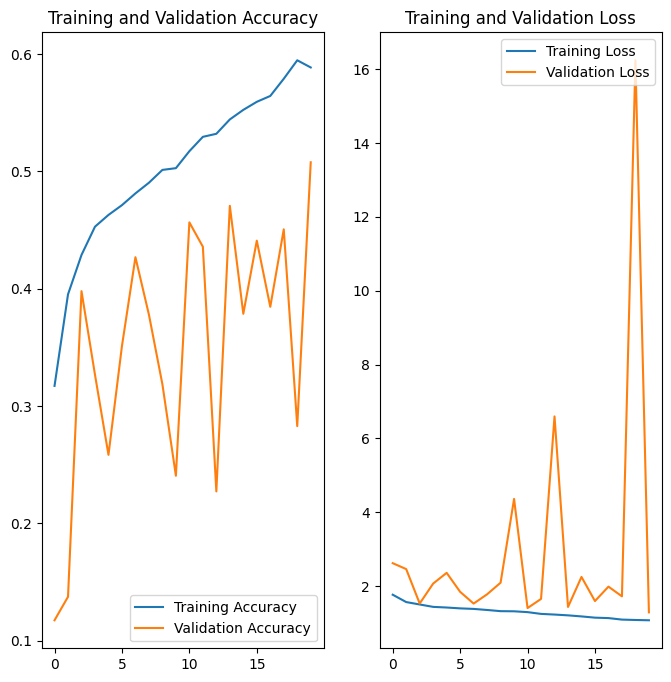

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### The model created is underfitting. May be more training can help

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomCrop(100, 100)
  ]
)


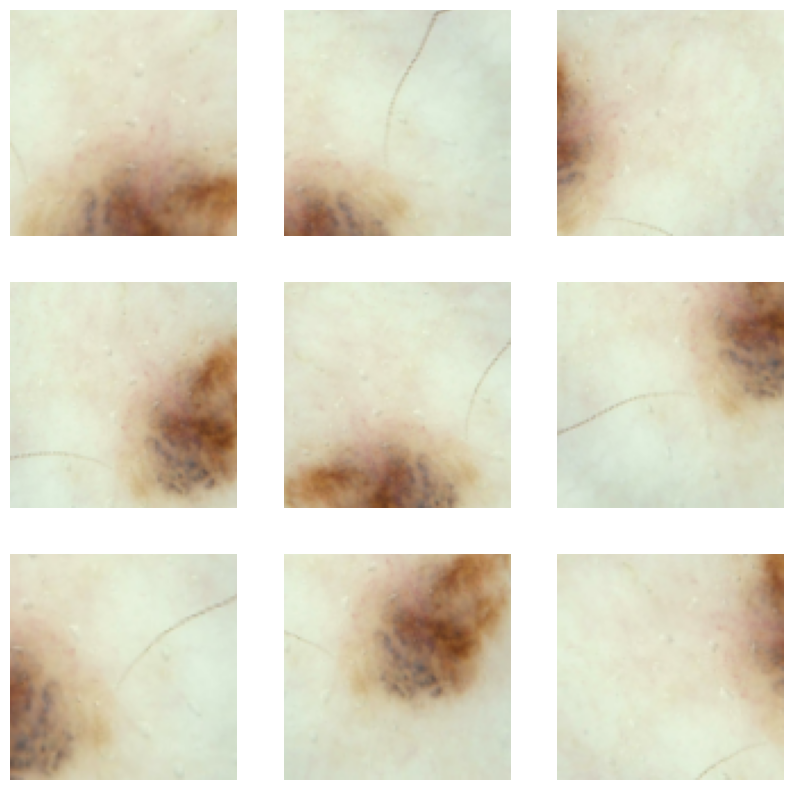

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [19]:
num_classes=len(class_names)

### Todo:
### Create the model, compile and train the model


In [20]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
def make_model(input_shape, num_classes):
    ### Your code goes here
    inputs = layers.Input(shape=(img_width, img_height, 3))

    # Rescale images to [0, 1]
    x = layers.Rescaling(scale=1.0 / 255)(inputs)
    
    # augmentation
    x = data_augmentation(x)

    # Apply some convolution and pooling layers
    x = layers.Conv2D(filters=8, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Apply global average pooling to get flat feature vectors
    #x = layers.GlobalAveragePooling2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(1024)(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256)(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(0.5)(x)

    
    # Add a dense classifier on top
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    
    return model


### Compiling the model

In [21]:
## Your code goes here

model = make_model(input_shape=(img_width, img_height, 3), 
                   num_classes=num_classes)
model.compile(
    optimizer=keras.optimizers.Adam(2e-4),
    loss="sparse_categorical_crossentropy",
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
)

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint("model/checkpoints/save_at_{epoch}.h5"),
    keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max',patience=20)
    #keras.callbacks.EarlyStopping(patience=5)
]

history = model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/20
169/169 [==============================] - 10s 27ms/step - loss: 2.1379 - accuracy: 0.2077 - val_loss: 2.1583 - val_accuracy: 0.1841
Epoch 2/20
169/169 [==============================] - 3s 17ms/step - loss: 1.8273 - accuracy: 0.3231 - val_loss: 2.0946 - val_accuracy: 0.2094
Epoch 3/20
169/169 [==============================] - 3s 17ms/step - loss: 1.6343 - accuracy: 0.3787 - val_loss: 1.8309 - val_accuracy: 0.3007
Epoch 4/20
169/169 [==============================] - 3s 20ms/step - loss: 1.5578 - accuracy: 0.4078 - val_loss: 1.8291 - val_accuracy: 0.3437
Epoch 5/20
169/169 [==============================] - 3s 17ms/step - loss: 1.5203 - accuracy: 0.4256 - val_loss: 1.5317 - val_accuracy: 0.4321
Epoch 6/20
169/169 [==============================] - 4s 21ms/step - loss: 1.4633 - accuracy: 0.4492 - val_loss: 1.5176 - val_accuracy: 0.4402
Epoch 7/20
169/169 [==============================] - 3s 20ms/step - loss: 1.4337 - accuracy: 0.4527 - val_loss: 1.3790 - val_accuracy: 0.467

#epochs = 8

#callbacks = [
    keras.callbacks.ModelCheckpoint("model/checkpoints/save_at_{epoch}.h5"),
    keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=8)
    #keras.callbacks.EarlyStopping(patience=5)
]

#history = model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

### Visualizing the results

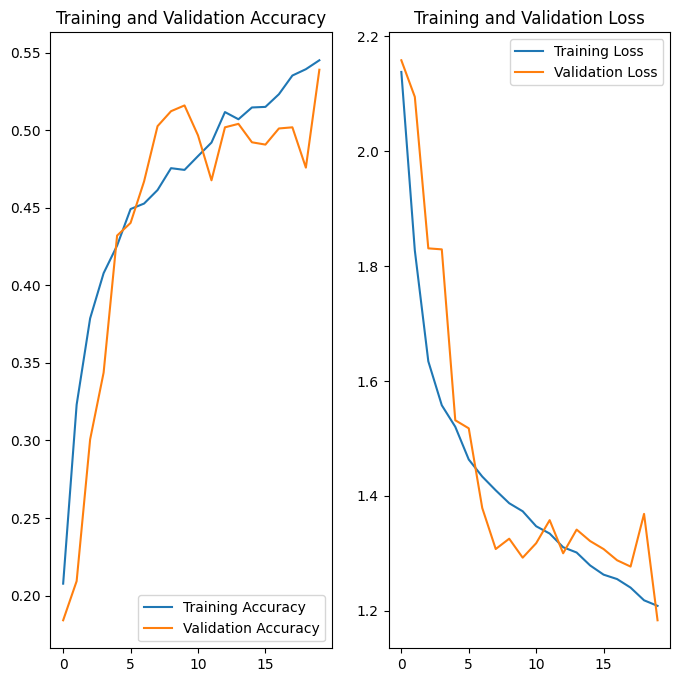

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
## Your code goes here.
for image_class in class_names:
    n_images_per_class = len(list(data_dir_train.joinpath(image_class).glob('*.jpg')))
    print(f'No. of images for the class {image_class} is {n_images_per_class} ( {(n_images_per_class/image_count_train)*100:.2f} % of total images)')

No. of images for the class actinic keratosis is 114 ( 5.09 % of total images)
No. of images for the class basal cell carcinoma is 376 ( 16.79 % of total images)
No. of images for the class dermatofibroma is 95 ( 4.24 % of total images)
No. of images for the class melanoma is 438 ( 19.56 % of total images)
No. of images for the class nevus is 357 ( 15.94 % of total images)
No. of images for the class pigmented benign keratosis is 462 ( 20.63 % of total images)
No. of images for the class seborrheic keratosis is 77 ( 3.44 % of total images)
No. of images for the class squamous cell carcinoma is 181 ( 8.08 % of total images)
No. of images for the class vascular lesion is 139 ( 6.21 % of total images)


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
#from pathlib import Path
#data_dir_train_augmented= Path("E:/Upgrad Ml and AI/Deep Learning/Melanoma detection assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmented/")

path_to_training_dataset = os.path.join('gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration','Train')
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + os.path.sep + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1670103FA0>: 100%|██████████| 500/500 [00:23<00:00, 21.31 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F166422B1F0>: 100%|██████████| 500/500 [00:22<00:00, 21.78 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F167AAE76A0>: 100%|██████████| 500/500 [00:22<00:00, 22.71 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F1670162620>: 100%|██████████| 500/500 [02:02<00:00,  4.09 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F16642079A0>: 100%|██████████| 500/500 [01:33<00:00,  5.33 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F167EB7E5F0>: 100%|██████████| 500/500 [00:24<00:00, 20.31 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F16642293F0>: 100%|██████████| 500/500 [00:55<00:00,  9.07 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F16701FD2D0>: 100%|██████████| 500/500 [00:21<00:00, 22.87 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1664B991E0>: 100%|██████████| 500/500 [00:26<00:00, 19.03 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_original = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_original = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [31]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
dataframe_dict_original = dict(zip(path_list_original, lesion_list_original))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-32-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [33]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [35]:
data_dir_train="gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [37]:
## your code goes here

model=Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),   
    layers.Dense(9, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [40]:

## Final model with lr as 0.001
# Mixed Precision FP16 training
os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'  
# tf.keras.mixed_precision.set_global_policy('mixed_float16')

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
opt = tf.keras.mixed_precision.LossScaleOptimizer(opt)

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 64)      18496     
                                                                 
 batch_normalization_5 (Batc  (None, 178, 178, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 89, 89, 64)       

#### **Todo:**  Train your model

In [41]:
#We can select higher epochs also, but right now, 50% more epochs have been taken than previous runs of fitting model.


epochs = 30
epochs = 30

reducelr  = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, 
                              patience=5, 
                              verbose=0, 
                              mode='auto', 
                              min_delta=0.002, 
                              cooldown=0, 
                              min_lr=0)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[reducelr]
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


281/281 [==============================] - 89s 282ms/step - loss: 4.9225 - accuracy: 0.2304 - val_loss: 6.1949 - val_accuracy: 0.1678 - lr: 0.0010
Epoch 2/30
281/281 [==============================] - 79s 278ms/step - loss: 1.8536 - accuracy: 0.3295 - val_loss: 4.0111 - val_accuracy: 0.1767 - lr: 0.0010
Epoch 3/30
281/281 [==============================] - 78s 272ms/step - loss: 1.6562 - accuracy: 0.3932 - val_loss: 3.0008 - val_accuracy: 0.2835 - lr: 0.0010
Epoch 4/30
281/281 [==============================] - 80s 278ms/step - loss: 1.4182 - accuracy: 0.4660 - val_loss: 26.2863 - val_accuracy: 0.0988 - lr: 0.0010
Epoch 5/30
281/281 [==============================] - 88s 311ms/step - loss: 1.3072 - accuracy: 0.4974 - val_loss: 4.9393 - val_accuracy: 0.2501 - lr: 0.0010
Epoch 6/30
281/281 [==============================] - 79s 276ms/step - loss: 1.1872 - accuracy: 0.5547 - val_loss: 1.7732 - val_accuracy: 0.5220 - lr: 0.0010
Epoch 7/30
281/281 [==============================] - 77s 270m

#### **Todo:**  Visualize the model results

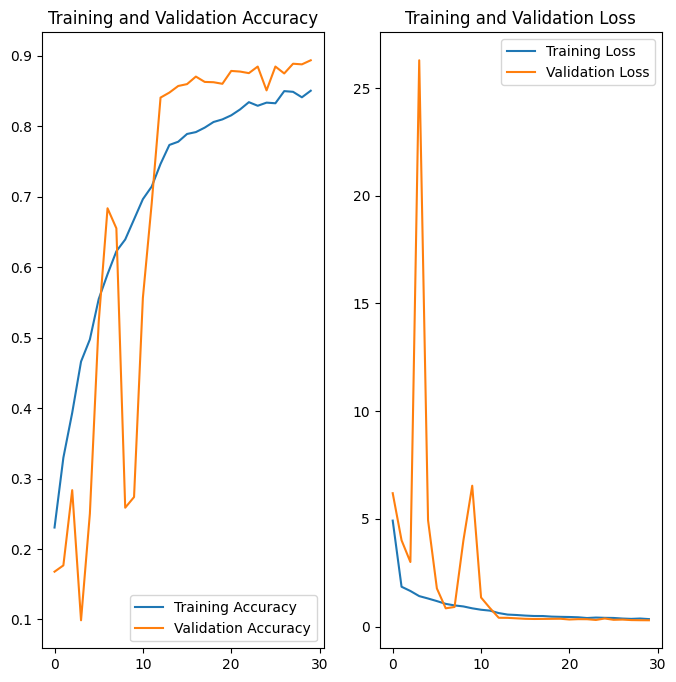

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

#### The model is performing significantly better compared to previous runs.
#### The overfitting problem has been addressed as one can see the difference between training and validation accuracy.

#### The class rebalance seems to have helped,